<a href="https://colab.research.google.com/github/iiserkbikram/Fashion_MNIST_Clothing_Classification_using_CNN/blob/main/Fashion_MNIST_Clothing_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
# Prevents unnecessary warninigs
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Tensorflow and tf.keras
import tensorflow as tf

# libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import os
import subprocess
import json
import cv2
import requests
from tqdm import tqdm

print(tf. __version__)


2.9.2


# **Objective**
To build a simple CNN (Convolution Neural Network) classifier by training model on Fashin MNIST dataset. The dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is 28x28 grascale image, which associated with a label from 10 classes. The goal is to classify those images into apparel catagory amongst 10 catagories on which, the model will be trained. 

Here, we will build 2 deep learining Convolution Neural Network (CNN) classifier,


*   A simple CNN from scratch
*   Fine - tunning a pre-trained VGG-16 CNN





**Load Dataset**

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top",'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']



4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images.dtype

dtype('uint8')

# **Training a simple CNN Classifier from Scratch**

**Reshaping Image Data for Modelling**

In [7]:
# reshaping the image before training the model
train_images_gr = train_images.reshape(train_images.shape[0],28,28,1)
test_images_gr = test_images.reshape(test_images.shape[0],28,28,1)


In [8]:
train_images_gr.shape, test_images_gr.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

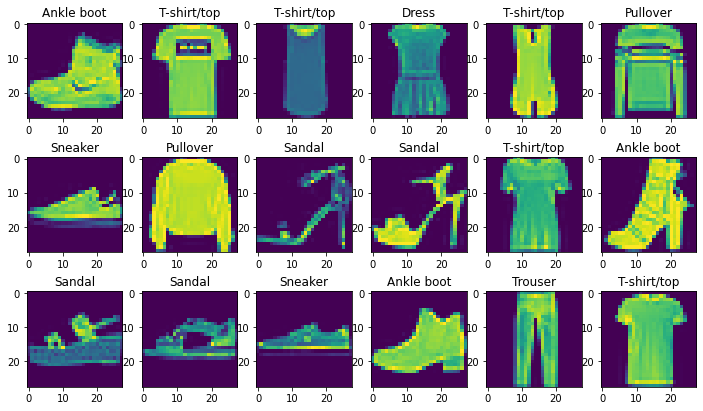

In [9]:
# Let's see some images
fig, ax = plt.subplots(3,6, figsize=(12,7))
c = 0
for i in range(18):
  idx = i//6
  idy = i%6
  ax[idx,idy].imshow(train_images_gr[i].reshape(28,28))
  ax[idx, idy].set_title(class_names[train_labels[i]])

**CNN Model Architechture**

In [10]:
# INPUT shape
INPUT_SHAPE = (28,28,1)

# Sequential model
model = tf.keras.models.Sequential()
# Conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), strides = (1,1),padding='valid',
                                 filters=16, activation='relu',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
# Conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), strides=(1,1), padding="valid",
                                 filters=32, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Flattern layer
model.add(tf.keras.layers.Flatten())

# dense layers with some dropouts
model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# Ouput layer
model.add(tf.keras.layers.Dense(10, activation= 'sigmoid'))

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# View model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

**Model Training**

We will train our model for 100 epochs and graph the performace. We will also apply early-stopping to stop the model training immediately once we don't see an improvement in validation loss over the last 5 epochs using `EarlyStopping ` callback. 

In [11]:
EPOCHS = 100

# Normalise the image pixel value
train_images_scaled = train_images_gr / 255

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                               restore_best_weights=True,
                                               verbose = 1)

history = model.fit(train_images_scaled,train_labels,
                    batch_size = 64,
                    callbacks=[es_callback],
                    validation_split = 0.1, epochs = EPOCHS,
                    verbose = 1)

Epoch 1/100
844/844 [==============================] - 15s 7ms/step - loss: 0.5784 - accuracy: 0.7858 - val_loss: 0.3827 - val_accuracy: 0.8615
Epoch 2/100
844/844 [==============================] - 4s 5ms/step - loss: 0.3706 - accuracy: 0.8645 - val_loss: 0.3347 - val_accuracy: 0.8795
Epoch 3/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3185 - accuracy: 0.8836 - val_loss: 0.2867 - val_accuracy: 0.8947
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2855 - accuracy: 0.8952 - val_loss: 0.2670 - val_accuracy: 0.8998
Epoch 5/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2611 - accuracy: 0.9043 - val_loss: 0.2543 - val_accuracy: 0.9070
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2450 - accuracy: 0.9097 - val_loss: 0.2510 - val_accuracy: 0.9058
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2265 - accuracy: 0.9151 - val_loss: 0.2487 - val_accuracy: 0.908

**Plotting the learning graphs**

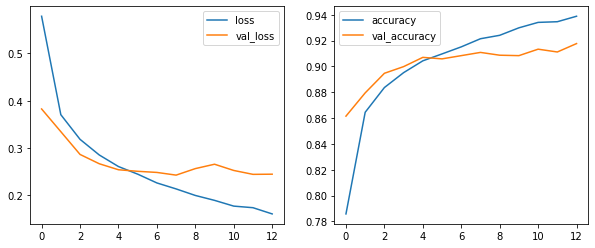

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(kind='line',ax=ax[0])
history_df[['accuracy','val_accuracy']].plot(kind='line',ax=ax[1]);

**Prediction on Test Data**

In [13]:
# Normalising the pixel values
test_images_scaled = test_images_gr / 255.

predictions = model.predict(test_images_scaled)

313/313 [==============================] - 1s 3ms/step


In [14]:
predictions[:4]

array([[5.3946837e-04, 3.8400208e-06, 1.2025843e-05, 6.8042791e-06,
        1.5317951e-07, 8.6181390e-01, 2.4917257e-05, 8.9130551e-01,
        2.0195472e-04, 9.9999976e-01],
       [5.9547120e-01, 2.3720703e-09, 9.9999940e-01, 2.2166056e-04,
        6.2089115e-01, 1.2749607e-09, 7.6534623e-01, 1.1732243e-11,
        2.9547350e-06, 1.9818480e-09],
       [2.0719474e-02, 1.0000000e+00, 5.1153550e-04, 6.1653174e-02,
        3.1989039e-05, 2.3727122e-07, 5.6277082e-04, 8.3358392e-10,
        3.1288739e-05, 1.6535706e-12],
       [3.1524955e-03, 1.0000000e+00, 1.4960328e-04, 1.3671334e-02,
        8.5827865e-05, 2.2607798e-08, 5.0432468e-04, 4.5474260e-10,
        3.3797485e-06, 1.1548865e-13]], dtype=float32)

In [15]:
# Find the max probabilty
prediction_labels = np.argmax(predictions, axis = 1)
prediction_labels[:4]

array([9, 2, 1, 1])

In [16]:
# Classification chart
print(classification_report(test_labels,prediction_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.84      0.90      0.87      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.86      0.87      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.66      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [17]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns = class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,877,0,18,29,1,1,69,0,5,0
Trouser,0,977,0,20,0,0,1,0,2,0
Pullover,15,0,900,8,34,0,43,0,0,0
Dress,11,1,8,936,24,0,18,0,2,0
Coat,1,0,66,24,868,0,41,0,0,0
Sandal,0,0,0,0,0,977,0,16,0,7
Shirt,134,0,80,33,79,0,656,0,18,0
Sneaker,0,0,0,0,0,11,0,956,0,33
Bag,4,1,3,3,2,2,1,3,980,1
Ankle boot,0,0,0,0,0,3,1,20,0,976


In [18]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [19]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [20]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 13ms/step


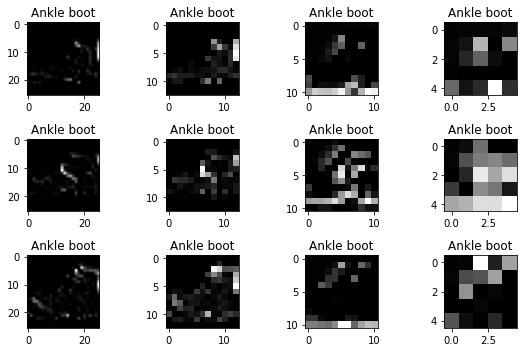

In [21]:
f, axarr = plt.subplots(3,4, figsize=(8, 5))

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 12

for x in range(0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[0,x].grid(False)
  axarr[0,x].set_title(class_names[test_labels[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[1,x].grid(False)
  axarr[1,x].set_title(class_names[test_labels[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[2,x].grid(False)
  axarr[2,x].set_title(class_names[test_labels[THIRD_IMAGE]])
plt.tight_layout()

1/1 [==============================] - 0s 13ms/step


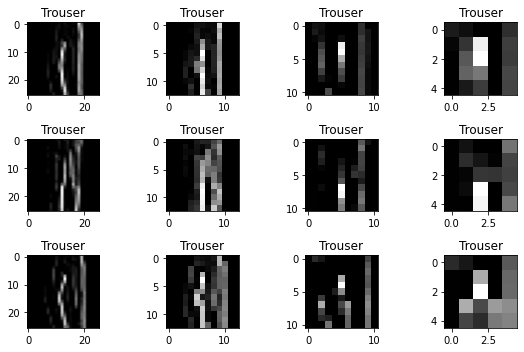

In [22]:
f, axarr = plt.subplots(3,4, figsize=(8, 5))

FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 12

for x in range(0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[0,x].grid(False)
  axarr[0,x].set_title(class_names[test_labels[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[1,x].grid(False)
  axarr[1,x].set_title(class_names[test_labels[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[2,x].grid(False)
  axarr[2,x].set_title(class_names[test_labels[THIRD_IMAGE]])
plt.tight_layout()

1/1 [==============================] - 0s 13ms/step


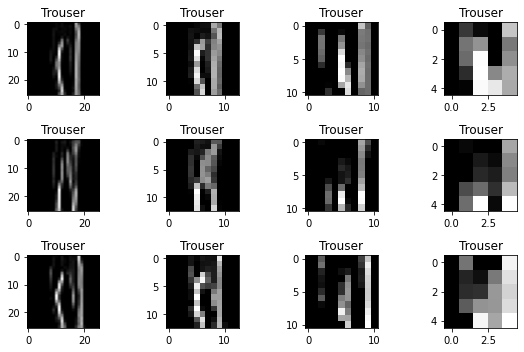

In [23]:
f, axarr = plt.subplots(3,4, figsize=(8, 5))

FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 3

for x in range(0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[0,x].grid(False)
  axarr[0,x].set_title(class_names[test_labels[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[1,x].grid(False)
  axarr[1,x].set_title(class_names[test_labels[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[2,x].grid(False)
  axarr[2,x].set_title(class_names[test_labels[THIRD_IMAGE]])
plt.tight_layout()

# **Fine tuning a pre-trained VGG-16 CNN Model**
We will use a VGG-19 model which was pre-trained on the ImageNet dataset by finetuning it on the Fashion-MNIST dataset.



*   VGG-19 models is a 19-layer (Convolutional and fully connected) deep learining network built on the ImageNet database. 
*   16 convolutional layers using 3x3 convolution filter along with max pooling layers 
*   2 fully connected hidden layers of 4096 units in each layer followed by a dense layer of 1000 units
*   We will be not needing the last three layers since we will be using our own fully connected dense layers to predict apparel classes








**Reshaping Image Data**\
We will convert the images to 3-channel images (image pixel tensors) as the VGG model was originally trained on RGB images.

In [24]:
train_images_3ch = np.stack([train_images]*3, axis=-1)
test_images_3ch = np.stack([test_images]*3, axis=-1)

print('\nTrain_images.shape: {}, of {}'.format(train_images_3ch.shape, train_images_3ch.dtype))
print('Test_images.shape: {}, of {}'.format(test_images_3ch.shape, test_images_3ch.dtype))


Train_images.shape: (60000, 28, 28, 3), of uint8
Test_images.shape: (10000, 28, 28, 3), of uint8


**Resizing Image Data for Modelling**\
The minimum image size the VGG model expects is 32x32, hence we need to resize the images

In [25]:
import cv2

def resize_image_array(img,img_size_dims):
  img = cv2.resize(img,dsize=img_size_dims,
                   interpolation=cv2.INTER_CUBIC)
  img = np.array(img,dtype=np.float32)
  return img

In [26]:
%%time

IMG_DIMS = (32, 32)

train_images_3ch = [resize_image_array(img, img_size_dims=IMG_DIMS) for img in train_images_3ch]
test_images_3ch = [resize_image_array(img, img_size_dims=IMG_DIMS) for img in test_images_3ch]



CPU times: user 1.39 s, sys: 335 ms, total: 1.73 s
Wall time: 1.77 s


In [27]:
train_images_3ch = np.array(train_images_3ch)
test_images_3ch = np.array(test_images_3ch)

In [28]:
print('\nTrain_images.shape: {}, of {}'.format(train_images_3ch.shape, train_images_3ch.dtype))
print('Test_images.shape: {}, of {}'.format(test_images_3ch.shape, test_images_3ch.dtype))


Train_images.shape: (60000, 32, 32, 3), of float32
Test_images.shape: (10000, 32, 32, 3), of float32


# **CNN Model Architecture**
We will build our CNN model architechture customizing the VGG-19 model.

In [29]:
# define input shape
INPUT_SHAPE = (32,32,3)

# get the VGG model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights = 'imagenet', include_top=False,
                                               input_shape=INPUT_SHAPE)
vgg_layers.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

**Set layers to trainable to enable fine-tunning**

In [30]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
  layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe484155790> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4e8d00100> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4e8d00340> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe46d7a3e50> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe46c43aac0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe46c43f910> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe4e8d00370> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe46d7cf1f0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe46c4185b0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4e8c96130> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe46d7e9160> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe46c4619d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4e8495820> True
<keras.layers.convolutional.conv2d.

**Building CNN model on the top of VGG19**

In [31]:
# Sequential mode
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# Add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# Add output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# View model layer
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 dense_3 (Dense)             (None, 1, 1, 256)         131328    
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 256)         0         
                                                                 
 dense_4 (Dense)             (None, 1, 1, 256)         65792     
                                                                 
 dropout_3 (Dropout)         (None, 1, 1, 256)         0         
                                                                 
 dense_5 (Dense)             (None, 1, 1, 10)          2570      
                                                                 
Total params: 20,224,074
Trainable params: 20,224,074


In [32]:
EPOCHS = 100

# Normalising the pixel values
train_images_3ch_scaled = train_images_3ch / 255
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                               restore_best_weights = True,
                                               verbose=1)

history = model.fit(train_images_3ch_scaled, train_labels,
                    batch_size = 64,
                    callbacks = [es_callback],
                    validation_split = 0.1, epochs = EPOCHS,
                    verbose=1)

Epoch 1/100
844/844 [==============================] - 42s 47ms/step - loss: 0.5610 - accuracy: 0.1108 - val_loss: 0.4063 - val_accuracy: 0.1116
Epoch 2/100
844/844 [==============================] - 39s 46ms/step - loss: 0.3271 - accuracy: 0.1126 - val_loss: 0.2740 - val_accuracy: 0.1113
Epoch 3/100
844/844 [==============================] - 39s 46ms/step - loss: 0.2737 - accuracy: 0.1128 - val_loss: 0.2687 - val_accuracy: 0.1120
Epoch 4/100
844/844 [==============================] - 39s 46ms/step - loss: 0.2454 - accuracy: 0.1129 - val_loss: 0.2411 - val_accuracy: 0.1121
Epoch 5/100
844/844 [==============================] - 39s 46ms/step - loss: 0.2187 - accuracy: 0.1129 - val_loss: 0.2286 - val_accuracy: 0.1119
Epoch 6/100
844/844 [==============================] - 39s 46ms/step - loss: 0.1940 - accuracy: 0.1132 - val_loss: 0.2105 - val_accuracy: 0.1120
Epoch 7/100
844/844 [==============================] - 39s 47ms/step - loss: 0.1814 - accuracy: 0.1133 - val_loss: 0.2074 - val_ac

**Plot Learning Curves**

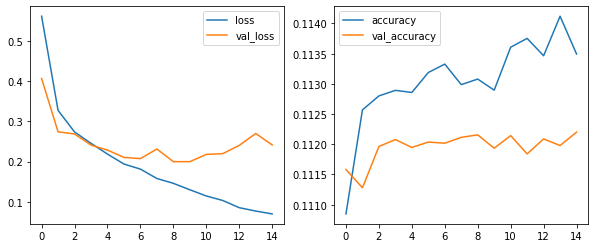

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

**Evalution of Model Performace on Test Data**

In [56]:
test_images_3ch_scaled = test_images_3ch /255.
predictions = model.predict(test_images_3ch_scaled)
predictions = tf.squeeze(predictions)

313/313 [==============================] - 4s 12ms/step


In [57]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:4]


array([9, 2, 1, 1])

In [59]:
print(classification_report(test_labels,prediction_labels, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.89      0.88      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.87      0.89      1000
       Dress       0.94      0.90      0.92      1000
        Coat       0.83      0.93      0.87      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.80      0.79      0.79      1000
     Sneaker       0.97      0.96      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.98      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [60]:
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns=class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,878,1,13,16,5,0,81,0,6,0
Trouser,1,986,1,8,0,0,2,0,2,0
Pullover,15,1,867,7,57,0,52,0,1,0
Dress,13,2,7,896,57,0,25,0,0,0
Coat,1,0,25,5,927,0,42,0,0,0
Sandal,0,0,0,0,0,990,0,10,0,0
Shirt,78,1,34,19,74,0,790,0,4,0
Sneaker,0,0,0,0,0,9,0,965,0,26
Bag,1,0,0,2,3,3,0,1,989,1
Ankle boot,0,0,0,0,0,4,1,18,0,977
